{(0, 0): 0.07309706454015788, (1, 0): 0.0078303484668759069, (1, 1): 0.075014015404076886, (2, 0): 0.0063034808344592987, (2, 1): 0.0013862360518847225, (2, 2): 0.0020548667641474908, (2, 3): 0.072002638184358578, (3, 0): 0.0046242963728633782, (3, 1): 0.001191754809810134, (3, 2): 0.0012312616142094257, (3, 3): 0.0012019056140228301, (3, 4): 0.0020032794439740469, (3, 5): 0.00090009319247689491, (3, 6): 0.00157578974493251, (3, 7): 0.06207779449667835}


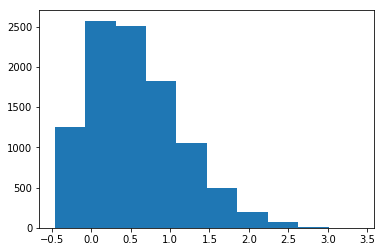

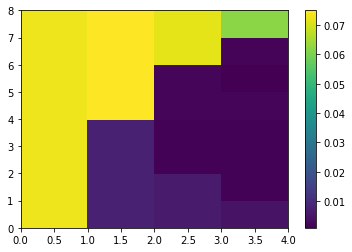

In [83]:
import numpy as np
import matplotlib.pyplot as plt
#from matplotlib.ticker import MaxNLocator
import pandas as pd
import wavetools as wt

Nr=3
No=3
src=0
epsilon=0.01
# data location
url='../data/InputParameters.txt'
# load data
dataframe=pd.read_csv(url,header=None,sep='\s+ ',engine='python')
P=No+1
wv=wt.wavetools(P)
wv.genWVlets()
roots=np.copy(wv.roots)
data=dataframe[src]
details={}
lDetails=np.zeros(P)
rlen=roots.shape[0]
QuantileOnRoots=np.zeros(rlen)
for aNr in range(Nr+1):
    cNri=2**aNr
    for Nri in range(cNri):
        r=np.copy(wv.roots)
        if aNr>0:
            r=wv.rescY(roots,aNr,Nri)
        for i in range(rlen):
            QuantileOnRoots[i]=data.quantile(r[i])
        lDetails=wv.cmpDetails(QuantileOnRoots)
        details[(aNr,Nri)]=sum(abs(lDetails))

print(details)
def maptoZ(NrMax,Nr,Nri,details):
    NriCnt=2**NrMax
    NrDiff=NrMax-Nr
    realNri=Nri// (2**NrDiff)
    #print("({},{}->{})".format(Nr,Nri,realNri))
    return details[(Nr,realNri)]

x=np.arange(0,Nr+2)
y=np.arange(0,2**Nr+1)
X,Y =np.meshgrid(x,y,indexing='ij')
Z=np.zeros(X.shape)
lX=X.size
for i in range(Nr+1):
    for j in range(2**Nr):
        Z[i,j]=maptoZ(Nr,X[i,j],Y[i,j],details)

plt.hist(data)
plt.show()
#levels = MaxNLocator(nbins=15).tick_values(Z.min(), Z.max())
#plt.contourf(X,Y,Z,levels=levels)
#plt.colorbar()
#plt.show()
plt.pcolormesh(X,Y,Z)
plt.colorbar()
plt.show()